### About this file

* Data
* Variable      Definition
* User_ID       User ID
* Product_ID    Product ID
* Gender        Sex of User
* Age           Age in bins
* Occupation    Occupation (Masked)
* City_Category    Category of the City (A,B,C)
* Stay_In_Current_City_Years    Number of years stay in current city
* Marital_Status    Marital Status
* Product_Category_1    Product Category (Masked)
* Product_Category_2    Product may belongs to other category also (Masked)
* Product_Category_3    Product may belongs to other category also (Masked)
* Purchase    Purchase Amount (Target Variable)

In [3]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### Viewing data

In [4]:
df = pd.read_csv(r"D:\Data Science\Project\Black Friday Sales EDA\train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
# Check null value
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# Check duplicated values
df.duplicated().sum()

0

In [10]:
# Rename the columns
df.rename(mapper = lambda x: x.lower(), axis = 1, inplace = True)
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

## Data Preprocessing

In [11]:
category = df.loc[:, ['product_category_1', 'product_category_2','product_category_3']]
category.describe()

,product_category_1,product_category_2,product_category_3
count,550068.000000,376430.000000,166821.000000
mean,5.404270,9.842329,12.668243
std,3.936211,5.086590,4.125338
min,1.000000,2.000000,3.000000
25%,1.000000,5.000000,9.000000
50%,5.000000,9.000000,14.000000
75%,8.000000,15.000000,16.000000
max,20.000000,18.000000,18.000000


From the min and max value of product category, the measurement may be from 1 to 20. It is suitable to consider nan value     as 0 which is not in the value range

In [12]:
# Nan value treatment

df.fillna(0, inplace = True)
df.product_category_2.unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
df.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [14]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df.loc[:, 'gender']  # Female = 0, Male = 1

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: gender, Length: 550068, dtype: int32

### Some exploration

In [19]:
print("""The average customer spend about {:.2f}, interestingly 99% of customers
spend less or equal to {} while the most shopping expense on Black Friday is {}""".format(df['purchase'].mean(), 
df['purchase'].quantile(0.99), df['purchase'].max()))

The average customer spend about 9263.97, interestingly 99% of customers
spend less or equal to 20665.0 while the most shopping expense on Black Friday is 23961


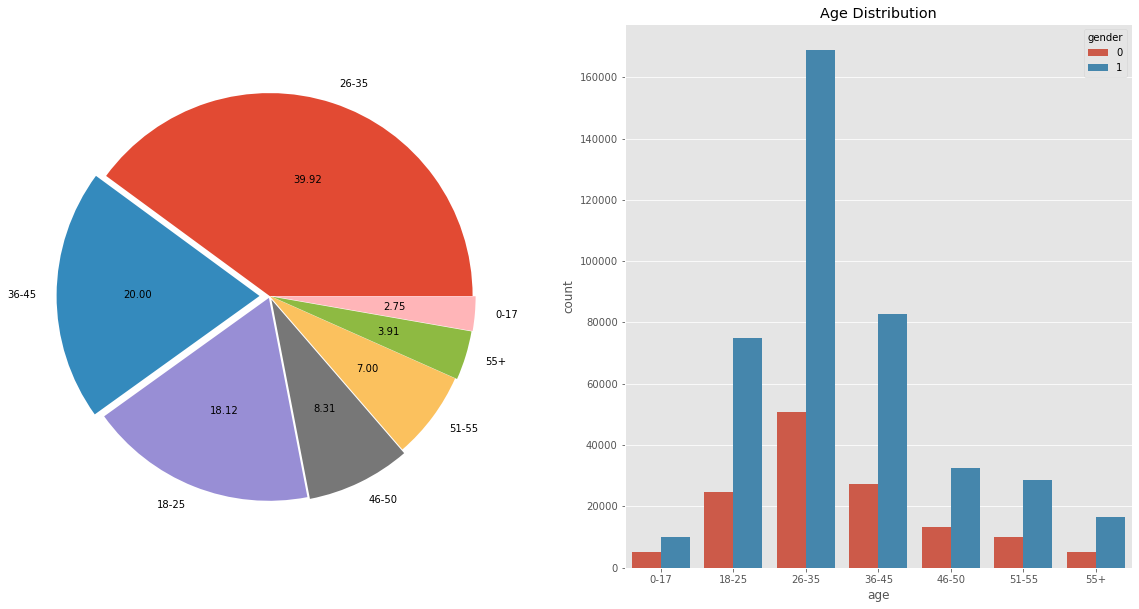

In [20]:
# Age distribuiton
    
plt.figure(figsize = (20, 10))
plt.style.use('ggplot')


plt.subplot(1, 2, 1)
age = df.age.value_counts().reset_index(name = 'count')
age.rename(mapper = {'index': 'age'}, axis = 1, inplace = True)

plt.pie(x = age['count'], labels = age['age'], autopct = '%.2f',
        explode = (0, 0.05, 0.01, 0.02, 0, 0.01, 0.015))

plt.subplot(1, 2, 2)
sns.countplot(x = 'age', data = df, hue = 'gender',
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

plt.title('Age Distribution', loc = 'center')
plt.show()

Most customers are young citizens, who are from 18 to 36 years old (78.04%), while 39.92% of those are from 26 - 35 age group. Interestingly, for this dats set, male customers go shopping more frequently than female customers significantly in every age group. It might be confusing for us due to the fact that female prefers to shopping than male in real life.

In [28]:
# Convert to int data type
df['stay_in_current_city_years'] = [4 if x == '4+' else int(x) for x in df['stay_in_current_city_years']]

df.stay_in_current_city_years.value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: stay_in_current_city_years, dtype: int64

Text(0.5, 1.0, 'Purchase distributed by age')

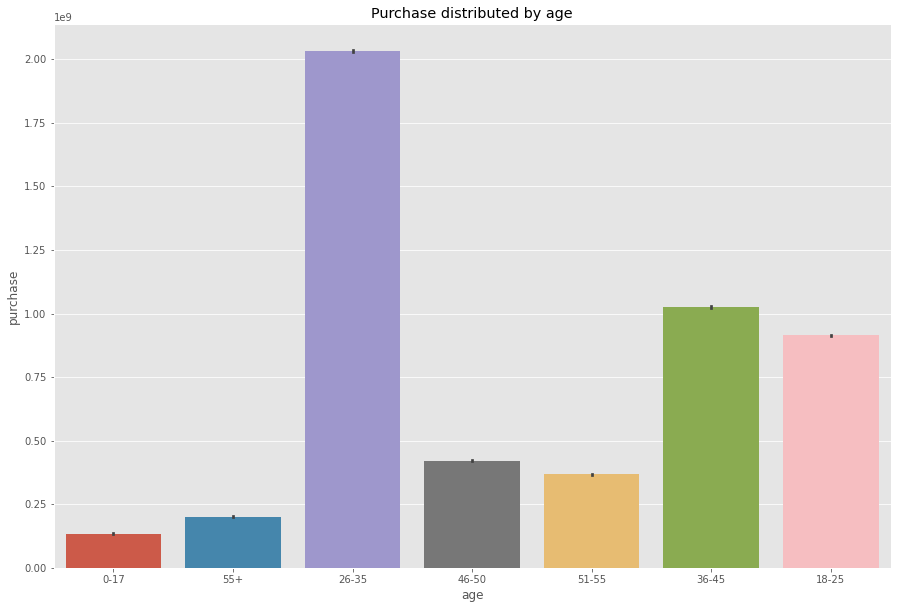

In [32]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'age', y = 'purchase', data = df, estimator = sum)

plt.title('Purchase distributed by age')

On Black Friday, the highest expense on shopping reaches more than 2,000,000,000 dollars which is from 26-to-35-year-old residents. It is following by 36-45 and 18-25 group that both are approximately around 1,000,000 dollars. Interestingly, this distribution on purchase looks similar to distribution on frequency of each age group given above.

In [34]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4,0,8,0.0,0.0,7969


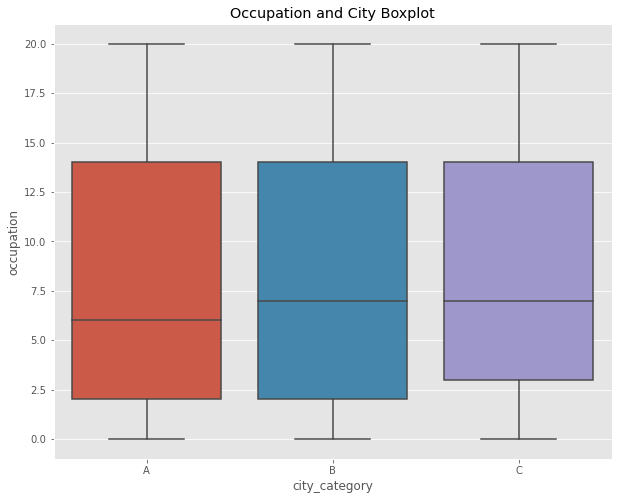

In [35]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, x= 'city_category', y = 'occupation',
            order = ['A', 'B', 'C'])
plt.title('Occupation and City Boxplot')
plt.show()

A, B, C city have the same value range of occupation, 50% of citizens in city B and C have less than 7 as living income, while in city A, this number is just 6. In addition, 75% citizens of all cities get less than about 13 as occupation and the value ranges are from 0 to 20 simultaneously.

### Correlation check

<AxesSubplot:>

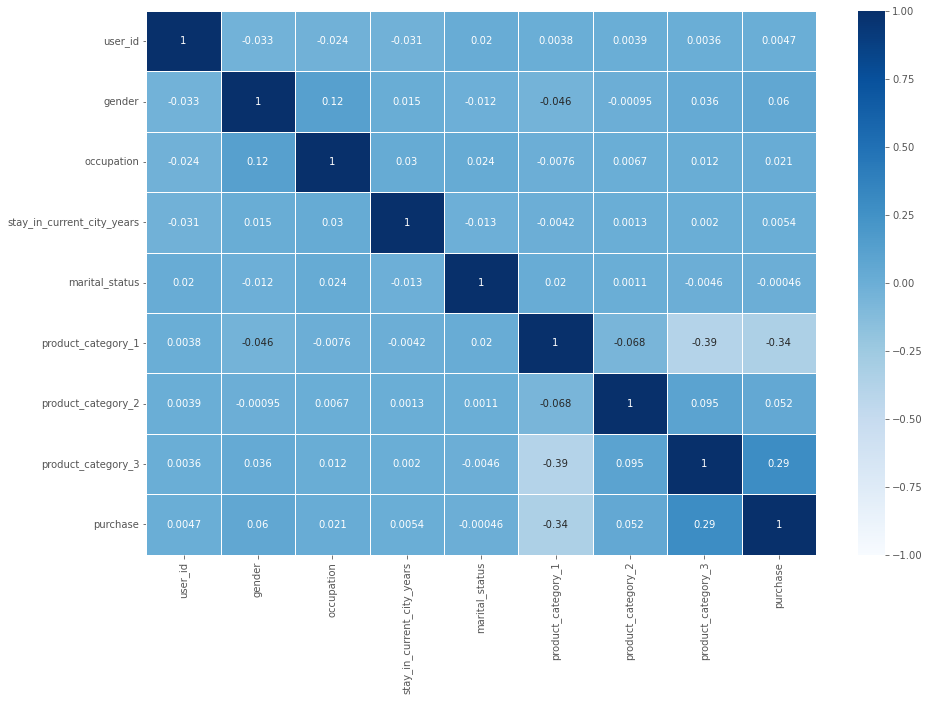

In [36]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'Blues',
            vmin = -1, vmax = 1, linewidth = 0.5,
            annot = True)

The highest positive correlation with the purchase is product category 3 (0.29), and the highest negative one is product category 1 (-0.34). Moreover, producte category 1 and 3 seems to correlate to each other linearly (Pearson corr = -0.39)

## About Feature Filtering and Linearity

Product category 1, product category 2, product category 3, gender, occupation seems significantly correlate to purchase linearly. If I use linear regression to predict purchase using only those features, it could be more efficient.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
X = df.loc[:, ['product_category_1', 'product_category_3', 'gender', 'product_category_2', 'occupation']]
y = df.loc[:, 'purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")

The shape of X_train is: (440054, 5)
The shape of X_test is: (110014, 5)


In [40]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(f"The coefficients is: {reg.coef_}")
print(f"The intercept is: {reg.intercept_}")

The coefficients is: [-346.31298015  145.51290103  460.4570634    13.16620919    8.3268798 ]
The intercept is: 10071.08149009194


In [41]:
y_pred = reg.predict(X_test)

result = pd.DataFrame({'Prediction': y_pred, 'True value': y_test,
                       'Error': abs(y_pred - y_test)})
result['Percent Error (%)'] = result['Error']/result['True value'] * 100
result

,Prediction,True value,Error,Percent Error (%)
107430,9071.840922,3441,5630.840922,163.639666
44336,8799.973653,5288,3511.973653,66.414025
130641,6755.403291,4565,2190.403291,47.982547
511220,12442.960400,11655,787.960400,6.760707
133224,10556.968796,7167,3389.968796,47.299690
...,...,...,...,...
277864,7019.511467,3053,3966.511467,129.921764
326579,5007.184631,12887,7879.815369,61.145460
32415,12710.925128,15162,2451.074872,16.165907
390965,8899.896210,1722,7177.896210,416.834855


In [42]:
err_chosen = r2_score(y_test, y_pred)
rmse_chosen = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"The R2 Score for the test is: {err_chosen}")

print(f"Root mean squared error is: {rmse_chosen}")

The R2 Score for the test is: 0.1477372067272641
Root mean squared error is: 4643.382768102634


In [43]:
# Get all numeric features

X = df.loc[:, ['product_category_1', 'product_category_3', 'gender', 'product_category_2', 'occupation', 'gender', 'stay_in_current_city_years']]
y = df.loc[:, 'purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
reg.fit(X_train, y_train)

err_all = r2_score(y_test, y_pred)
rmse_all = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"The R2 Score for the test is: {err_all}")

print(f"Root mean squared error is: {rmse_all}")

The R2 Score for the test is: -0.14824008368691777
Root mean squared error is: 5385.772715031927


In [44]:
compare = pd.DataFrame(data = {'Filtered R2': [err_chosen],'All R2': [err_all], 'Filtered RMSE': [rmse_chosen], 'All RMSE': [rmse_all]},
                       index = None)

compare

,Filtered R2,All R2,Filtered RMSE,All RMSE
0,0.147737,-0.14824,4643.382768,5385.772715


With the low R2 score, linearity may not be the best method to describe the relationship in this dataset        
              
However, I recognize something interesting. To simplify the linear model, what we need to do is filter out features and to do that, correlation heatmap will give us which features are correlated with each other linearly. I am astonished to observe linearity, and when I choose some features based on high Pearson correlation (out of the features), they seems to be crucial and the R2 score seems to get worse by adding other features that have the lower correlation coefficient.                  

If I get all the numeric features for linear regression, it is obvious that R2 squared is negative, Residual Sums of the prediction line is even worse than the mean line (very bad with poor accuracy for prediction)